# Units, Quantities, and Constants

The [astropy.units](https://docs.astropy.org/en/stable/units/) sub-package in astropy provides a way to define units and quantities (values or arrays with a unit attached), as well as a way to convert between them. It supports advanced features such as equivalencies to convert between units that are not strictly equivalent (e.g. various spectral coordinates) as well as e.g. logarithmic units.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Access units and create quantities</li>
<li>Combine quantities together</li>
<li>Convert quantities to different units</li>
<li>Understand and use equivalencies</li>
<li>Use logarithmic units</li>
<li>Plot quantities with units</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.units. For more information about the features presented below as well as other available features, you can read the
[astropy.units documentation](https://docs.astropy.org/en/stable/units/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Representing units and quantities

Astropy includes a framework that allows users to attach units to scalars and arrays, and manipulate/combine these, keeping track of the units.

Since we may want to use a number of units in expressions, it is easiest and most concise to import the units module with:

In [2]:
import astropy.units as u

Units can then be accessed with:

In [3]:
u.m

Unit("m")

In [4]:
u.pc

Unit("pc")

In [5]:
u.kg

Unit("kg")

In [6]:
u.s

Unit("s")

We can also create composite units:

In [7]:
u.m / u.kg/u.s**2

Unit("m / (kg s2)")

The most useful feature about the units is the ability to attach them to scalars or arrays, creating ``Quantity`` objects:

In [8]:
time = 3 * u.Myr

In [9]:
time

<Quantity 3. Myr>

In [10]:
type(time)

astropy.units.quantity.Quantity

and we can use this with composite units:

In [14]:
weights = [2, 3, 4] * u.kg
weights

<Quantity [2., 3., 4.] kg>

We can access the unit and the value of a quantity separately:

In [17]:
import numpy as np
distance = np.array([1.1, 1.2, 1.3]) * u.kpc
distance

<Quantity [1.1, 1.2, 1.3] kpc>

In [18]:
H0 = 75 * u.km / u.s / u.Mpc
H0

<Quantity 75. km / (Mpc s)>

In [19]:
H0.value

75.0

In [20]:
H0.unit

Unit("km / (Mpc s)")

Finally, note that 'imperial' units can be accessed using:

In [23]:
from astropy.units import imperial
imperial.gallon

Unit("gallon")

## Combining and converting quantities

Quantities can be combined via standard arithmetic - for example multiplication and division will result in the units being combined:

In [25]:
speed = distance / time
speed

<Quantity [0.36666667, 0.4       , 0.43333333] kpc / Myr>

while addition and subtraction will work only if the units are compatible:

In [31]:
start_distance = 10 * u.kpc
end_distance = 0.3 * u.Mpc
end_distance - start_distance

<Quantity 0.29 Mpc>

Quantities can be converted to different units using ``.to``:

In [33]:
speed.to(u.km/u.h)

<Quantity [1290685.73261864, 1408020.79922034, 1525355.86582203] km / h>

There are also convenience attributes to convert quantities to e.g. SI and cgs units:

In [34]:
speed.si

<Quantity [358523.81461629, 391116.88867232, 423709.96272834] m / s>

In [35]:
speed.cgs

<Quantity [35852381.46162894, 39111688.86723156, 42370996.2728342 ] cm / s>

Finally, by default units will not be simplified - but you can use the ``.decompose()`` method for this:

In [36]:
speed / H0 

<Quantity [0.00488889, 0.00533333, 0.00577778] kpc Mpc s / (km Myr)>

In [37]:
( speed / H0).decompose()

<Quantity [1.47505186e+23, 1.60914749e+23, 1.74324311e+23] m>

or you can convert directly to the desired unit:

In [39]:
( speed / H0 ).to(u.Mpc)

<Quantity [4.78031753, 5.21489185, 5.64946617] Mpc>


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge: Unit conversions</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the speed above to miles/hour</li>
<li>Calculate whether a pint is more than half litre.
    <em>You can compare quantities as comparing variables.</em>
    Notice something strange? Check what deffinition of <a href="https://en.wikipedia.org/wiki/Pint">pint</a> astropy is using.</li>
<li>Calculate the area of a rectangle of 3 km of side and 5 meter of width. Show this in $m^2$ and also convert it to yards$^2$</li>
</ol>

</div>

</section>


In [41]:
imperial.pint

Unit("pint")

## Composed units

Many units are compositions of others, and you can create new combinations for ease of use:

You can use the ``compose()`` unit to find other units that are equivalent:

In [42]:
u.joule.compose()

[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

In [43]:
(u.s ** -1 ).compose()

[Unit("Hz"), Unit("Bq"), Unit("2.7027e-11 Ci")]

You can also use ``find_equivalent_units`` to print a table with more information:

In [44]:
(u.km).find_equivalent_units()

Primary name,Unit definition,Aliases
AU,1.49598e+11 m,"au, astronomical_unit"
Angstrom,1e-10 m,"AA, angstrom"
cm,0.01 m,centimeter
earthRad,6.3781e+06 m,"R_earth, Rearth"
jupiterRad,7.1492e+07 m,"R_jup, Rjup, R_jupiter, Rjupiter"
lyr,9.46073e+15 m,lightyear
m,irreducible,meter
micron,1e-06 m,
pc,3.08568e+16 m,parsec
solRad,6.957e+08 m,"R_sun, Rsun"


## Dimensionless quantities

Sometime we get quantities which are effectively dimensionless:

In [45]:
dimensionless_quantity = 20 * u.cm/u.m
dimensionless_quantity

<Quantity 20. cm / m>

What happen if we add a number to this?

In [48]:
dimensionless_quantity + 3.2

<Quantity 3.4>

We can also convert to the actual dimensionless quantity using:

In [49]:
dimensionless_quantity.decompose()

<Quantity 0.2>

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers – for example converting between wavelength and frequency:

In [50]:
(635 * u.nm).to(u.Hz)

UnitConversionError: 'nm' (length) and 'Hz' (frequency) are not convertible

However we can make use of a spectral *equivalency* to indicate the link between the units:

In [51]:
(635 * u.nm).to(u.Hz, equivalencies=u.spectral())

<Quantity 4.72114107e+14 Hz>

Other built-in equivalencies are: 
 - [Parallax](https://docs.astropy.org/en/stable/units/equivalencies.html#how-to-convert-parallax-to-distance)
 - [Doppler](https://docs.astropy.org/en/stable/units/equivalencies.html#spectral-doppler-equivalencies)
 - [Spectral flux density](https://docs.astropy.org/en/stable/units/equivalencies.html#spectral-flux-luminosity-density-units)
 - [Brigthness temperature](https://docs.astropy.org/en/stable/units/equivalencies.html#brightness-temperature-surface-brightness-equivalency)
 - [Temperature energy](https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency)
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

We can use ``find_equivalent_units`` as above to show how using an equivalency expands the number of equivalent units:

In [52]:
u.Hz.find_equivalent_units()

Primary name,Unit definition,Aliases
Bq,1 / s,becquerel
Ci,3.7e+10 / s,curie
Hz,1 / s,"Hertz, hertz"


In [55]:
u.Hz.find_equivalent_units(equivalencies=u.spectral())

Primary name,Unit definition,Aliases
AU,1.49598e+11 m,"au, astronomical_unit"
Angstrom,1e-10 m,"AA, angstrom"
Bq,1 / s,becquerel
Ci,3.7e+10 / s,curie
Hz,1 / s,"Hertz, hertz"
J,kg m2 / s2,"Joule, joule"
Ry,2.17987e-18 kg m2 / s2,rydberg
cm,0.01 m,centimeter
eV,1.60218e-19 kg m2 / s2,electronvolt
earthRad,6.3781e+06 m,"R_earth, Rearth"



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge: Using equivalencies</h2>
</div>


<div class="panel-body">

<ol>
<li>Find out more about the spectral flux equivalency and convert 12 mJy to ergs/cm^2/s/Hz and to W/m^2/Hz</li>
</ol>

</div>

</section>


In [64]:
a = 12 * u.mJy
a.to(u.erg/u.cm**2/u.s/u.Hz)

<Quantity 1.2e-25 erg / (cm2 Hz s)>

## Logarithmic units

Quantities can also be constructed with [Logarithmic Units](https://docs.astropy.org/en/stable/units/logarithmic_units.html), including various kinds of magnitude and dex:

In [66]:
( 5 * u.STmag).to(u.erg/u.s/u.cm**2/u.AA)

<Quantity 3.63078055e-11 erg / (Angstrom cm2 s)>

In [73]:
( 15 * u.STmag).to(u.mJy, equivalencies=u.spectral_density(500 * u.AA))

<Quantity 0.03027745 mJy>

In [74]:
( 5 * u.ABmag).to(u.mJy)

<Quantity 36307.80547701 mJy>

In [75]:
( 3 * u.dex(u.m/u.s) ).to(u.cm/u.s)

<Quantity 100000. cm / s>

In [78]:
(u.K * u.cm**2).find_equivalent_units()

There are no equivalent units

## Printing the quantities

If you want to print quantities using formatting, you can use ``.value`` and ``.unit`` as shown here:

## Using quantities with Numpy functions

Quantities work as expected with a number of Numpy functions (though not all):

In [82]:
angle = np.linspace(0, 360, 1000) * u.deg
np.cos(angle)

<Quantity [ 1.        ,  0.99998022,  0.99992089,  0.999822  ,  0.99968356,
            0.99950557,  0.99928805,  0.999031  ,  0.99873443,  0.99839835,
            0.99802278,  0.99760773,  0.99715321,  0.99665925,  0.99612587,
            0.99555308,  0.99494091,  0.99428939,  0.99359853,  0.99286837,
            0.99209893,  0.99129025,  0.99044235,  0.98955528,  0.98862906,
            0.98766373,  0.98665934,  0.98561591,  0.9845335 ,  0.98341214,
            0.98225188,  0.98105276,  0.97981484,  0.97853816,  0.97722277,
            0.97586872,  0.97447607,  0.97304487,  0.97157518,  0.97006706,
            0.96852057,  0.96693576,  0.9653127 ,  0.96365146,  0.9619521 ,
            0.96021469,  0.95843929,  0.95662598,  0.95477483,  0.95288591,
            0.95095929,  0.94899506,  0.94699329,  0.94495406,  0.94287745,
            0.94076354,  0.93861241,  0.93642416,  0.93419886,  0.93193662,
            0.9296375 ,  0.92730161,  0.92492904,  0.92251988,  0.92007423,
            

In [84]:
np.exp( 4*u.m / (400*u.cm))

<Quantity 2.71828183>

## Performance considerations

If performance is important, and you are attaching units to arrays, you may want to consider using the ``<<`` operator to attach units to arrays - this prevents the array data from being copied:

In [92]:
array = np.random.random(10000000)

In [93]:
%time array * u.m/u.s

CPU times: user 21.3 ms, sys: 10.4 ms, total: 31.7 ms
Wall time: 30.9 ms


<Quantity [0.79183756, 0.09318577, 0.92888494, ..., 0.87079948, 0.75010835,
           0.41718258] m / s>

In [94]:
%time array << u.m/u.s

CPU times: user 21 µs, sys: 31 µs, total: 52 µs
Wall time: 54.4 µs


<Quantity [0.79183756, 0.09318577, 0.92888494, ..., 0.87079948, 0.75010835,
           0.41718258] m / s>

If you are using composite units in your code, it can also be beneficial to compute the composite units once and for all as shown earlier, e.g.:

In [95]:
kms = u.km/u.s

Finally, if having Quantity classes is still slowing down your code, you can consider using the units only to find scalefactors and then use then to modify arrays:

In [97]:
kph2cgs = (u.km/u.s).to(u.cm/u.s)

## Plotting quantities

To plot quantities nicely with Matplotlib we need to use the ``quantity_support`` function:

In [111]:
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f51252a46a0>

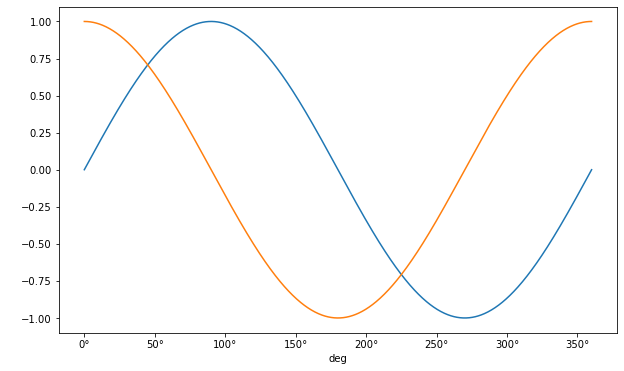

In [112]:
plt.plot(angle, np.sin(angle))
plt.plot(angle.to(u.rad), np.cos(angle))

## Physical constants

The [astropy.constants](https://docs.astropy.org/en/stable/constants/index.html) sub-package provides a set of physical constants which are compatible with the units/quantities framework:

In [114]:
import astropy.constants as consts

In [ ]:
consts.M


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Plotting the solar system potential</h2>
</div>


<div class="panel-body">

<ol>
<li>The gravitational potential around a point source is $V=-GM/r$ where $M$ is the mass of the point and $r$ is the radius from it. Use what we've seen above to make a plot of the gravitational potential (in MJ/kg) in the solar system between 1 and 50 au.</li>
</ol>

</div>

</section>


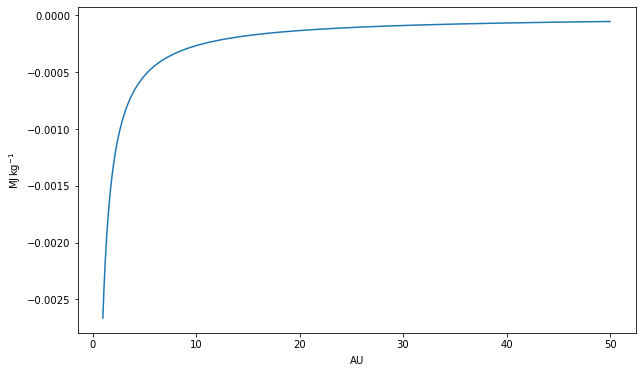

In [123]:
r = np.linspace(1, 50, 10000) << u.AU
potential = -consts.G * consts.M_earth / r
plt.plot(r, potential.to(u.MJ/u.kg))

<center><i>This notebook was written by <a href="https://aperiosoftware.com/">Aperio Software Ltd.</a> &copy; 2019, and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)